
<a id=''></a>

# Evaluation and selection of decision models


In [1]:
# importing librarie
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

The train_test_split function of scikit-learn allows us to randomly split the dataset into two partitions train (learning) and test (evaluation) according to arbitrary proportions.

As usual, it is interesting to visualize the data available to us. We can construct the scatter plots in two dimensions using Matplotlib:

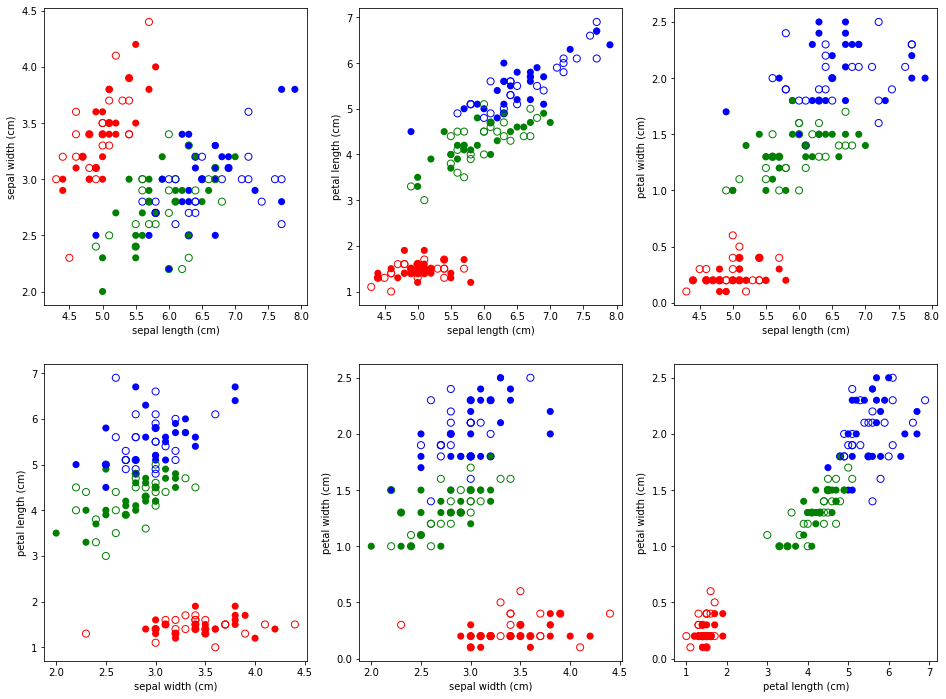

In [2]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[-1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
        plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train], s=50, edgecolors='none')
        plt.scatter(X_test[:,  dim1], X_test[:, dim2], c='none',  s=50, edgecolors=cmp[y_test])
        plt.xlabel(iris.feature_names[dim1])
        plt.ylabel(iris.feature_names[dim2])
        idx += 1
plt.show()

## Question 1

Why do we have six different point clouds? What does each figure represent?

In [3]:
# we select two from four attribtues one time, then we get six pairs totally.

In [4]:
n_features

4

In [5]:
data.shape

(150, 4)

In [6]:
#data

In [38]:
# Using MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

To estimate generalization error, we will use K-fold cross-validation. This will allow us to adjust, if necessary, the hyperparameters of the decision model. scikit-learn implements various cross-validation strategies in the sklearn.model_selection module. Let start by experimenting with the K-fold approach. The KFold object has a .split() method that generates lists of observation indices to be used for the training subset and for the validation subset. More details on this object can be found in the [K-Fold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

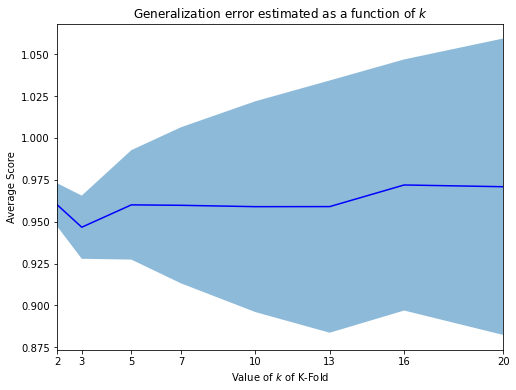

In [19]:
# KFold for different values of k
from sklearn.model_selection import KFold

# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show()

In [20]:
cv_scores

array([0.9601707 , 0.94666667, 0.96      , 0.95974026, 0.95892857,
       0.95897436, 0.971875  , 0.97083333])

In [21]:
max(cv_scores)

0.971875

In [22]:
# Question 2: What do you see when looking at this graph? Add values for k (eg 40, 100, be careful it will take longer…)
# and examine the graph again.

# std increases as k increases
# average score reaches the peak at k = 20

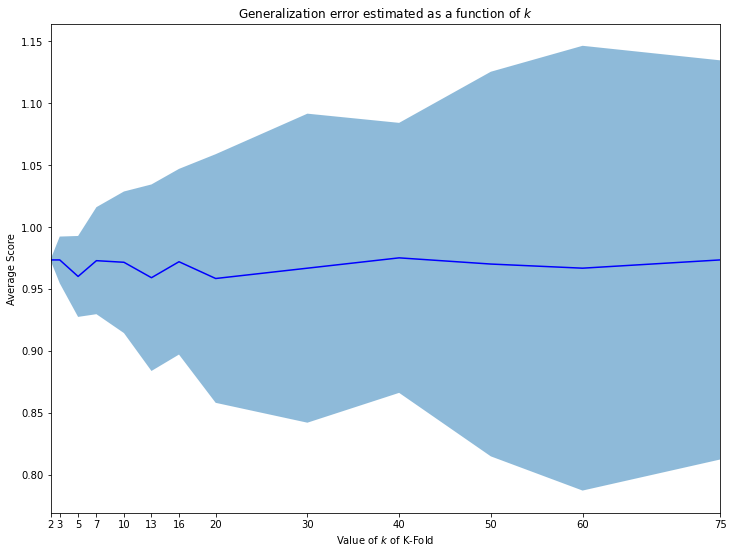

In [23]:
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20, 30, 40, 50, 60, 75])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(12, 9))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show()

In [24]:
cv_scores

array([0.97332859, 0.97333333, 0.96      , 0.97272727, 0.97142857,
       0.95897436, 0.971875  , 0.95833333, 0.96666667, 0.975     ,
       0.97      , 0.96666667, 0.97333333])

In [25]:
max(cv_scores)

0.975

In [26]:
# Question 3: For each model learned by k-fold cross-validation, add its evaluation on the test data set aside at the start X_test, y_test.
# Display the curves on the same graph. 
# What do you notice?

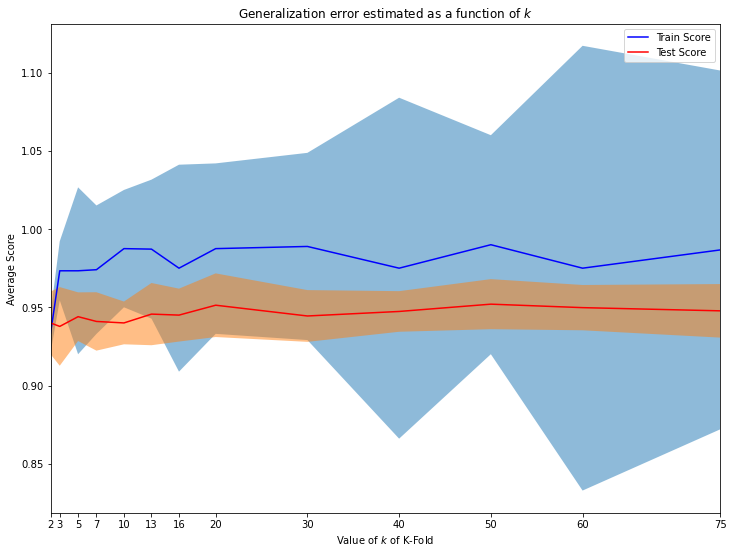

In [39]:
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20, 30, 40, 50, 60, 75])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

cv_scores_test = []
cv_scores_std_test = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    scores_test = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))  
        
        scores_test.append(clf.score(X_test, y_test))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores)) 
    
    cv_scores_test.append(np.mean(scores_test))
    cv_scores_std_test.append(np.std(scores_test))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
cv_scores_test, cv_scores_std_test = np.array(cv_scores_test), np.array(cv_scores_std_test)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(12, 9))

line1, = plt.plot(n_folds, cv_scores, 'b', label="Train Score")
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)

line2, = plt.plot(n_folds, cv_scores_test, 'r', label="Test Score")
plt.fill_between(n_folds, cv_scores_test + cv_scores_std_test, cv_scores_test - cv_scores_std_test, alpha=0.5)

plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.legend(handles=[line1, line2])
plt.show()

In [40]:
cv_scores

array([0.93349929, 0.97333333, 0.97333333, 0.97402597, 0.9875    ,
       0.98717949, 0.975     , 0.9875    , 0.98888889, 0.975     ,
       0.99      , 0.975     , 0.98666667])

In [41]:
max(cv_scores)

0.99

In [42]:
cv_scores_std

array([0.01244666, 0.01885618, 0.05333333, 0.04106854, 0.0375    ,
       0.04441156, 0.06614378, 0.05448624, 0.05983516, 0.10897247,
       0.07      , 0.14215602, 0.11469767])

In [43]:
cv_scores_test

array([0.94      , 0.93777778, 0.944     , 0.94095238, 0.94      ,
       0.94564103, 0.945     , 0.95133333, 0.94444444, 0.94733333,
       0.952     , 0.94977778, 0.94773333])

In [44]:
max(cv_scores_test)

0.9519999999999998

In [45]:
cv_scores_std_test

array([0.02      , 0.02514157, 0.01554921, 0.01866278, 0.0136626 ,
       0.01988792, 0.01691482, 0.02034153, 0.01654026, 0.01297861,
       0.016     , 0.01447689, 0.01711105])

In [46]:
# Question 4: Perform performance estimation using leave one out (LOO) cross-validation.
# What do you see comparing the results of k-fold and leave one out?

In [47]:
from sklearn.model_selection import LeaveOneOut

In [48]:
loo = LeaveOneOut()
loo.get_n_splits(X_train)

75

In [49]:
scores_loo = []
scores_loo_test = []

for train_index, test_index in loo.split(X_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_loo, X_test_loo = X_train[train_index], X_train[test_index]
    y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]
    #print(X_train_loo, X_test_loo, y_train_loo, y_test_loo)
    # learning with .fit()
    clf.fit(X_train_loo, y_train_loo)
    scores_loo.append(clf.score(X_test_loo, y_test_loo)) 
    scores_loo_test.append(clf.score(X_test, y_test))  


In [50]:
loo_score_train = np.mean(scores_loo)
loo_score_train

0.9866666666666667

In [51]:
loo_score_train_std = np.std(scores_loo)
loo_score_train_std

0.11469767022723507

In [52]:
loo_score_test = np.mean(scores_loo_test)
loo_score_test

0.9475555555555555

In [53]:
loo_score_test_std = np.std(scores_loo_test)
loo_score_test_std

0.014166557733785978

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# to use MLP
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.model_selection import GridSearchCV

In [80]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In [83]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3), tuned_parameters, cv=5)

# grid search execution
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(5,), (20,), (50,), (100,),
                                                (150,), (200,)]})

In [84]:
print(clf.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (20,)}


In [85]:
clf.cv_results_['mean_test_score']

array([0.86666667, 0.97333333, 0.93333333, 0.96      , 0.94666667,
       0.94666667, 0.92      , 0.94666667, 0.94666667, 0.94666667,
       0.94666667, 0.94666667, 0.94666667, 0.94666667, 0.96      ,
       0.94666667, 0.94666667, 0.94666667, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

In [86]:
max(clf.cv_results_['mean_test_score'])

0.9733333333333334

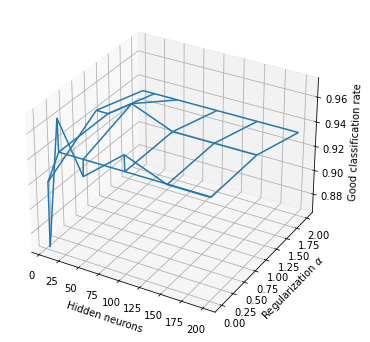

In [87]:
n_hidden = np.array([s[0] for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])

# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)

# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate")
ax.plot_wireframe(xx, yy, scores)
plt.show()

In [88]:
# Question 5: How many MLPs are learned in total in this example?

# 6*4 = 24

In [89]:
# Question 6: What is the meaning of the refit parameter of GridSearchCV?

# bool, str, or callable, default=True
# Refit an estimator using the best found parameters on the whole dataset.
# For multiple metric evaluation, this needs to be a str denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.

# We can define a function to be passed to the refit parameter of the GridSearchCV instance. 
# It will implement the custom strategy to select the best candidate from the cv_results_ attribute of the GridSearchCV. 
# Once the candidate is selected, it is automatically refitted by the GridSearchCV instance.

In [90]:
# Question 7: Take a more complete look at the contents of clf.cv_results_.

In [91]:
clf.cv_results_

{'mean_fit_time': array([0.02372646, 0.04096742, 0.05933776, 0.10050611, 0.0980701 ,
        0.11892848, 0.05660596, 0.06104708, 0.06574392, 0.1066318 ,
        0.101334  , 0.13662972, 0.07987151, 0.08024406, 0.10266047,
        0.13267918, 0.14309015, 0.15662165, 0.06933746, 0.08780422,
        0.10977168, 0.13428679, 0.18034639, 0.17147017]),
 'std_fit_time': array([0.00719101, 0.01268899, 0.03029793, 0.07599693, 0.02218845,
        0.0503756 , 0.03682766, 0.02631436, 0.02285679, 0.0643539 ,
        0.03608128, 0.06117525, 0.01932294, 0.02117065, 0.01419253,
        0.04073109, 0.03261558, 0.04942735, 0.0230502 , 0.01307982,
        0.01723207, 0.01250143, 0.01774596, 0.04049438]),
 'mean_score_time': array([0.00030684, 0.00312533, 0.        , 0.00160532, 0.00022159,
        0.        , 0.00310841, 0.00023479, 0.00311055, 0.00312467,
        0.00117946, 0.        , 0.00022478, 0.00103598, 0.00721493,
        0.        , 0.0003418 , 0.00312409, 0.00354757, 0.0031486 ,
        0.      

In [92]:
# Question 8: Evaluate the selected model on the test data (X_test, y_test).

In [93]:
clf.score(X_test, y_test)

0.9333333333333333

In [94]:
# Question 9: Do the appearance of the results encourage you to refine the grid? Edit the grid and review the new results.

In [129]:
tuned_parameters = { #'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'hidden_layer_sizes': np.arange(1,200),
                    'alpha':   [0.0001, 0.001, 0.01, 1, 2]}

In [130]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, max_iter=1000), tuned_parameters, cv=5, refit=True)

# grid search execution
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=1000, solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  6...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 1

In [131]:
print(clf.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': 31}


In [132]:
max(clf.cv_results_['mean_test_score'])

0.9866666666666667

In [133]:
clf.score(X_test, y_test)

0.9333333333333333

In [26]:
# we will use more accuarate hyperparamters tuning 
tuned_parameters2 = {
    'hidden_layer_sizes': np.arange(1,200,20),
    'alpha':  np.arange(0.01,2,0.1)
}

# GridSearchCV
clf2 = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, max_iter=1000), tuned_parameters2, cv=5, refit=True)
clf2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=1000, solver='lbfgs', tol=0.005),
             param_grid={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91]),
                         'hidden_layer_sizes': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])})

In [27]:
clf2.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': 81}

In [28]:
clf2.best_score_

0.9866666666666667

In [29]:
import pandas as pd
clf2_results = pd.concat([pd.DataFrame(clf2.cv_results_["params"]),pd.DataFrame(clf2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
clf2_results.head()

,alpha,hidden_layer_sizes,Accuracy
0,0.01,1,0.640000
1,0.01,21,0.960000
2,0.01,41,0.960000
3,0.01,61,0.946667
4,0.01,81,0.986667


In [30]:
clf2_contour = clf2_results.groupby(['hidden_layer_sizes','alpha']).mean()
clf2_contour

Accuracy
hidden_layer_sizes alpha          
1                  0.01   0.640000
                   0.11   0.506667
                   0.21   0.613333
                   0.31   0.613333
                   0.41   0.706667
...                            ...
181                1.51   0.960000
                   1.61   0.960000
                   1.71   0.960000
                   1.81   0.960000
                   1.91   0.960000

[200 rows x 1 columns]

In [31]:
clf2_reset = clf2_contour.reset_index()
clf2_reset.columns = ['hidden_layer_sizes', 'alpha', 'Accuracy']
clf2_pivot = clf2_reset.pivot('hidden_layer_sizes', 'alpha')
clf2_pivot

Accuracy                                          \
alpha                   0.01      0.11      0.21      0.31      0.41   
hidden_layer_sizes                                                     
1                   0.640000  0.506667  0.613333  0.613333  0.706667   
21                  0.960000  0.973333  0.960000  0.973333  0.986667   
41                  0.960000  0.973333  0.960000  0.986667  0.960000   
61                  0.946667  0.960000  0.960000  0.986667  0.973333   
81                  0.986667  0.960000  0.973333  0.986667  0.960000   
101                 0.960000  0.960000  0.973333  0.986667  0.986667   
121                 0.946667  0.973333  0.973333  0.986667  0.986667   
141                 0.946667  0.973333  0.973333  0.986667  0.986667   
161                 0.960000  0.973333  0.973333  0.986667  0.986667   
181                 0.973333  0.960000  0.973333  0.986667  0.986667   

                                                                      \
alpha                   0.51      0.61      0.71      0.81      0.91   
hidden_layer_sizes                                                     
1                   0.613333  0.746667  0.853333  0.480000  0.626667   
21                  0.960000  0.973333  0.986667  0.946667  0.960000   
41                  0.973333  0.986667  0.960000  0.946667  0.960000   
61                  0.986667  0.986667  0.960000  0.960000  0.960000   
81                  0.960000  0.986667  0.986667  0.946667  0.960000   
101                 0.973333  0.960000  0.960000  0.960000  0.973333   
121                 0.973333  0.973333  0.973333  0.960000  0.960000   
141                 0.986667  0.986667  0.973333  0.960000  0.960000   
161                 0.986667  0.960000  0.973333  0.960000  0.960000   
181                 0.986667  0.973333  0.973333  0.960000  0.960000   

                                                                            \
alpha                   1.01      1.11      1.21      1.31  1.41      1.51   
hidden_layer_sizes                                                           
1                   0.960000  0.586667  0.613333  0.613333  0.72  0.706667   
21                  0.960000  0.960000  0.960000  0.960000  0.96  0.946667   
41                  0.973333  0.960000  0.946667  0.960000  0.96  0.960000   
61                  0.960000  0.960000  0.960000  0.960000  0.96  0.960000   
81                  0.960000  0.960000  0.960000  0.960000  0.96  0.960000   
101                 0.960000  0.960000  0.960000  0.960000  0.96  0.960000   
121                 0.960000  0.960000  0.960000  0.960000  0.96  0.960000   
141                 0.973333  0.960000  0.960000  0.960000  0.96  0.960000   
161                 0.960000  0.960000  0.960000  0.960000  0.96  0.960000   
181                 0.960000  0.960000  0.960000  0.960000  0.96  0.960000   

                                                        
alpha                   1.61  1.71      1.81      1.91  
hidden_layer_sizes                                      
1                   0.706667  0.60  0.493333  0.613333  
21                  0.960000  0.96  0.960000  0.960000  
41                  0.960000  0.96  0.960000  0.960000  
61                  0.960000  0.96  0.960000  0.960000  
81                  0.960000  0.96  0.960000  0.960000  
101                 0.960000  0.96  0.960000  0.960000  
121                 0.960000  0.96  0.960000  0.960000  
141                 0.960000  0.96  0.960000  0.960000  
161                 0.960000  0.96  0.960000  0.960000  
181                 0.960000  0.96  0.960000  0.960000

In [32]:
x = clf2_pivot.columns.levels[1].values
y = clf2_pivot.index.values
z = clf2_pivot.values

In [33]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='alpha')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='hidden_layer_sizes') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [25]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='alpha',
                    yaxis_title='hidden_layer_size',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [120]:
# Question 10: Use randomized search with RandomizedSearchCV. 
# The “cost” (total number of evaluated combinations) can be set with n_iter. 
# Explain the choice of the laws used for drawing the values of the two (hyper)parameters hidden_layer_sizes and alpha

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [182]:
param_dist = {"hidden_layer_sizes": randint(1, 200),
              "alpha": [0.0001, 0.001, 0.01, 1, 2]}

In [183]:
clf = RandomizedSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, max_iter=1000), 
                         param_dist,n_iter=100, cv=5, refit=True,random_state=0)

In [184]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(max_iter=1000, solver='lbfgs',
                                           tol=0.005),
                   n_iter=100,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 1, 2],
                                        'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F060713820>},
                   random_state=0)

In [185]:
clf.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': 68}

In [186]:
clf.cv_results_["mean_test_score"]

array([0.93333333, 0.98666667, 0.94666667, 0.93333333, 0.94666667,
       0.96      , 0.93333333, 0.93333333, 0.96      , 0.94666667,
       0.97333333, 0.94666667, 0.96      , 0.97333333, 0.96      ,
       0.94666667, 0.94666667, 0.97333333, 0.94666667, 0.96      ,
       0.94666667, 0.94666667, 0.93333333, 0.94666667, 0.94666667,
       0.94666667, 0.94666667, 0.94666667, 0.70666667, 0.93333333,
       0.97333333, 0.94666667, 0.96      , 0.94666667, 0.94666667,
       0.93333333, 0.94666667, 0.94666667, 0.93333333, 0.93333333,
       0.94666667, 0.94666667, 0.94666667, 0.93333333, 0.94666667,
       0.93333333, 0.97333333, 0.94666667, 0.94666667, 0.96      ,
       0.94666667, 0.94666667, 0.97333333, 0.94666667, 0.94666667,
       0.94666667, 0.96      , 0.94666667, 0.94666667, 0.94666667,
       0.94666667, 0.94666667, 0.96      , 0.94666667, 0.93333333,
       0.96      , 0.94666667, 0.94666667, 0.97333333, 0.97333333,
       0.94666667, 0.96      , 0.94666667, 0.97333333, 0.93333

In [187]:
clf.best_score_

0.9866666666666667

In [188]:
clf.score(X_test, y_test)

0.9066666666666666

In [ ]:
# Question 11: Experiment with HalvingGridSearchCV. 
# Compare the final score and the calculation time with that obtained with GridSearchCV.

In [166]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [167]:
param_grid = {"hidden_layer_sizes": np.arange(1,200),
              "alpha": [0.0001, 0.001, 0.01, 1, 2]}

In [168]:
clf = HalvingGridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, max_iter=1000), 
                          param_grid, max_resources=30,random_state=0)

In [169]:
clf.fit(X_train, y_train)

HalvingGridSearchCV(estimator=MLPClassifier(max_iter=1000, solver='lbfgs',
                                            tol=0.005),
                    max_resources=30,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 2],
                                'hidden_layer_sizes': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,

In [170]:
clf.best_params_  

{'alpha': 0.0001, 'hidden_layer_sizes': 23}

In [171]:
clf.best_score_

1.0

In [172]:
clf.cv_results_

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [164]:
clf.score(X_test, y_test)

0.96